In [2]:
import warnings
warnings.filterwarnings('ignore') 

In [3]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

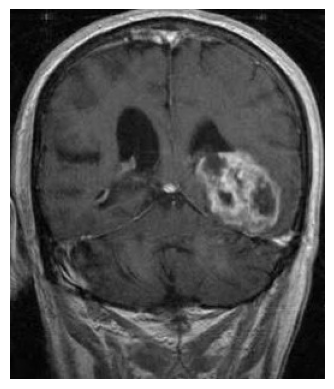

Shape of the image: (308, 262, 3)


In [4]:
from PIL import Image

# Load the image from a file
img = Image.open('/kaggle/input/brain-tumor-mri-dataset/Testing/meningioma/Te-meTr_0007.jpg')
img_array = np.array(img)

# Show the image
plt.imshow(img_array)
plt.axis('off')  
plt.show()

# Print the shape of the image
print("Shape of the image:", img_array.shape)


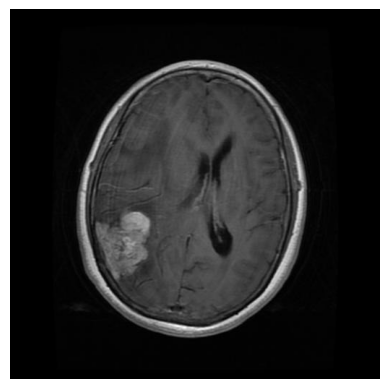

Shape of the image: (512, 512, 3)


In [5]:
from PIL import Image

# Load the image from a file
img = Image.open('/kaggle/input/brain-tumor-mri-dataset/Training/meningioma/Tr-meTr_0007.jpg')
img_array = np.array(img)

# Show the image
plt.imshow(img_array)
plt.axis('off')  
plt.show()

# Print the shape of the image
print("Shape of the image:", img_array.shape)


In [6]:
import os
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow.keras import layers

# Building Model
from keras.utils import plot_model
from tensorflow.keras import models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import legacy

# Training Model

from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.applications import ResNet50, DenseNet121, InceptionV3
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Data Processing
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import array_to_img
from tensorflow.keras.preprocessing.image import load_img

In [7]:
train_dir = '/kaggle/input/brain-tumor-mri-dataset/Training'
test_dir = '/kaggle/input/brain-tumor-mri-dataset/Testing'

In [8]:
def create_dataset(img_folder):
    img_data_array=[]
    class_name=[]
    for dir1 in os.listdir(img_folder):
        #print(dir1)
        for file in os.listdir(os.path.join(img_folder,dir1)):
            img=cv.imread(os.path.join(img_folder,dir1,file),cv.COLOR_BGR2RGB)
            img=cv.resize(img,(224,224),interpolation=cv.INTER_AREA)
            img=img.astype('float32')
            img/=255
            img_data_array.append(img)
            class_name.append(dir1)
    return img_data_array,class_name 
img_data,class_name=create_dataset("/kaggle/input/brain-tumor-mri-dataset/Training") 

In [9]:
def create_dataset(img_folder):
    img_data_array=[]
    class_name=[]
    for dir1 in os.listdir(img_folder):
        #print(dir1)
        for file in os.listdir(os.path.join(img_folder,dir1)):
            img=cv.imread(os.path.join(img_folder,dir1,file),cv.COLOR_BGR2RGB)
            img=cv.resize(img,(224,224),interpolation=cv.INTER_AREA)
            img=img.astype('float32')
            img/=255
            img_data_array.append(img)
            class_name.append(dir1)
    return img_data_array,class_name
img_data1,class_name1=create_dataset("/kaggle/input/brain-tumor-mri-dataset/Testing")
            

In [10]:
len(img_data),len(class_name)

(5712, 5712)

In [12]:
target_dict={k:v for v,k in enumerate(np.unique(class_name))}
target_dict

{'glioma': 0, 'meningioma': 1, 'notumor': 2, 'pituitary': 3}

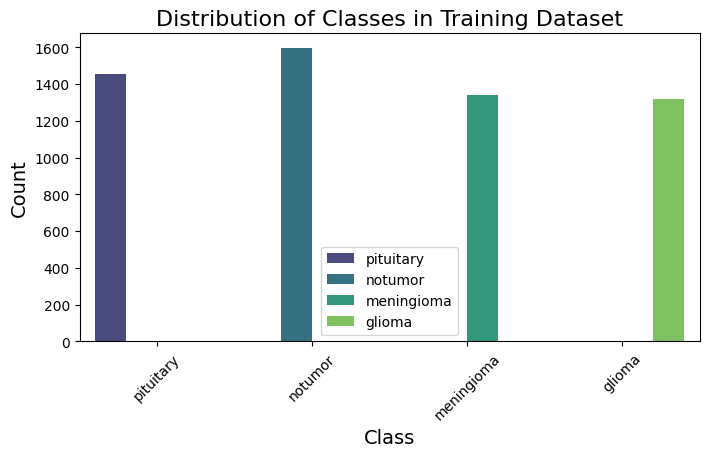

In [14]:
plt.figure(figsize=(8, 4))
ax = sns.countplot(x=class_name, hue=class_name, palette="viridis")
plt.title('Distribution of Classes in Training Dataset', fontsize=16)
plt.xlabel('Class', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)
plt.show()

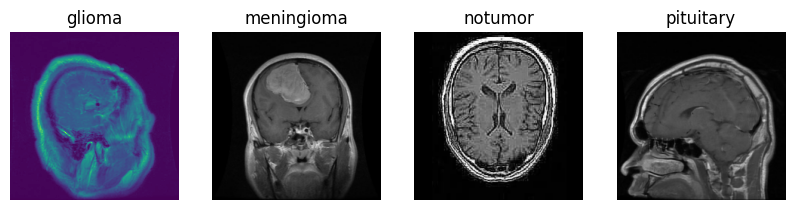

In [16]:
# Display a few sample images with their labels
unique_classes = np.unique(class_name)
plt.figure(figsize=(10, 10))
for i, unique_class in enumerate(unique_classes):
    # Find the first image of each class
    index = class_name.index(unique_class)
    sample_image = img_data[index]
    plt.subplot(1, len(unique_classes), i + 1)
    plt.imshow(sample_image)
    plt.title(unique_class)
    plt.axis('off')
plt.show()

In [21]:
class_types = ['pituitary', 'notumor', 'meningioma', 'glioma']
n_types = len(class_types)

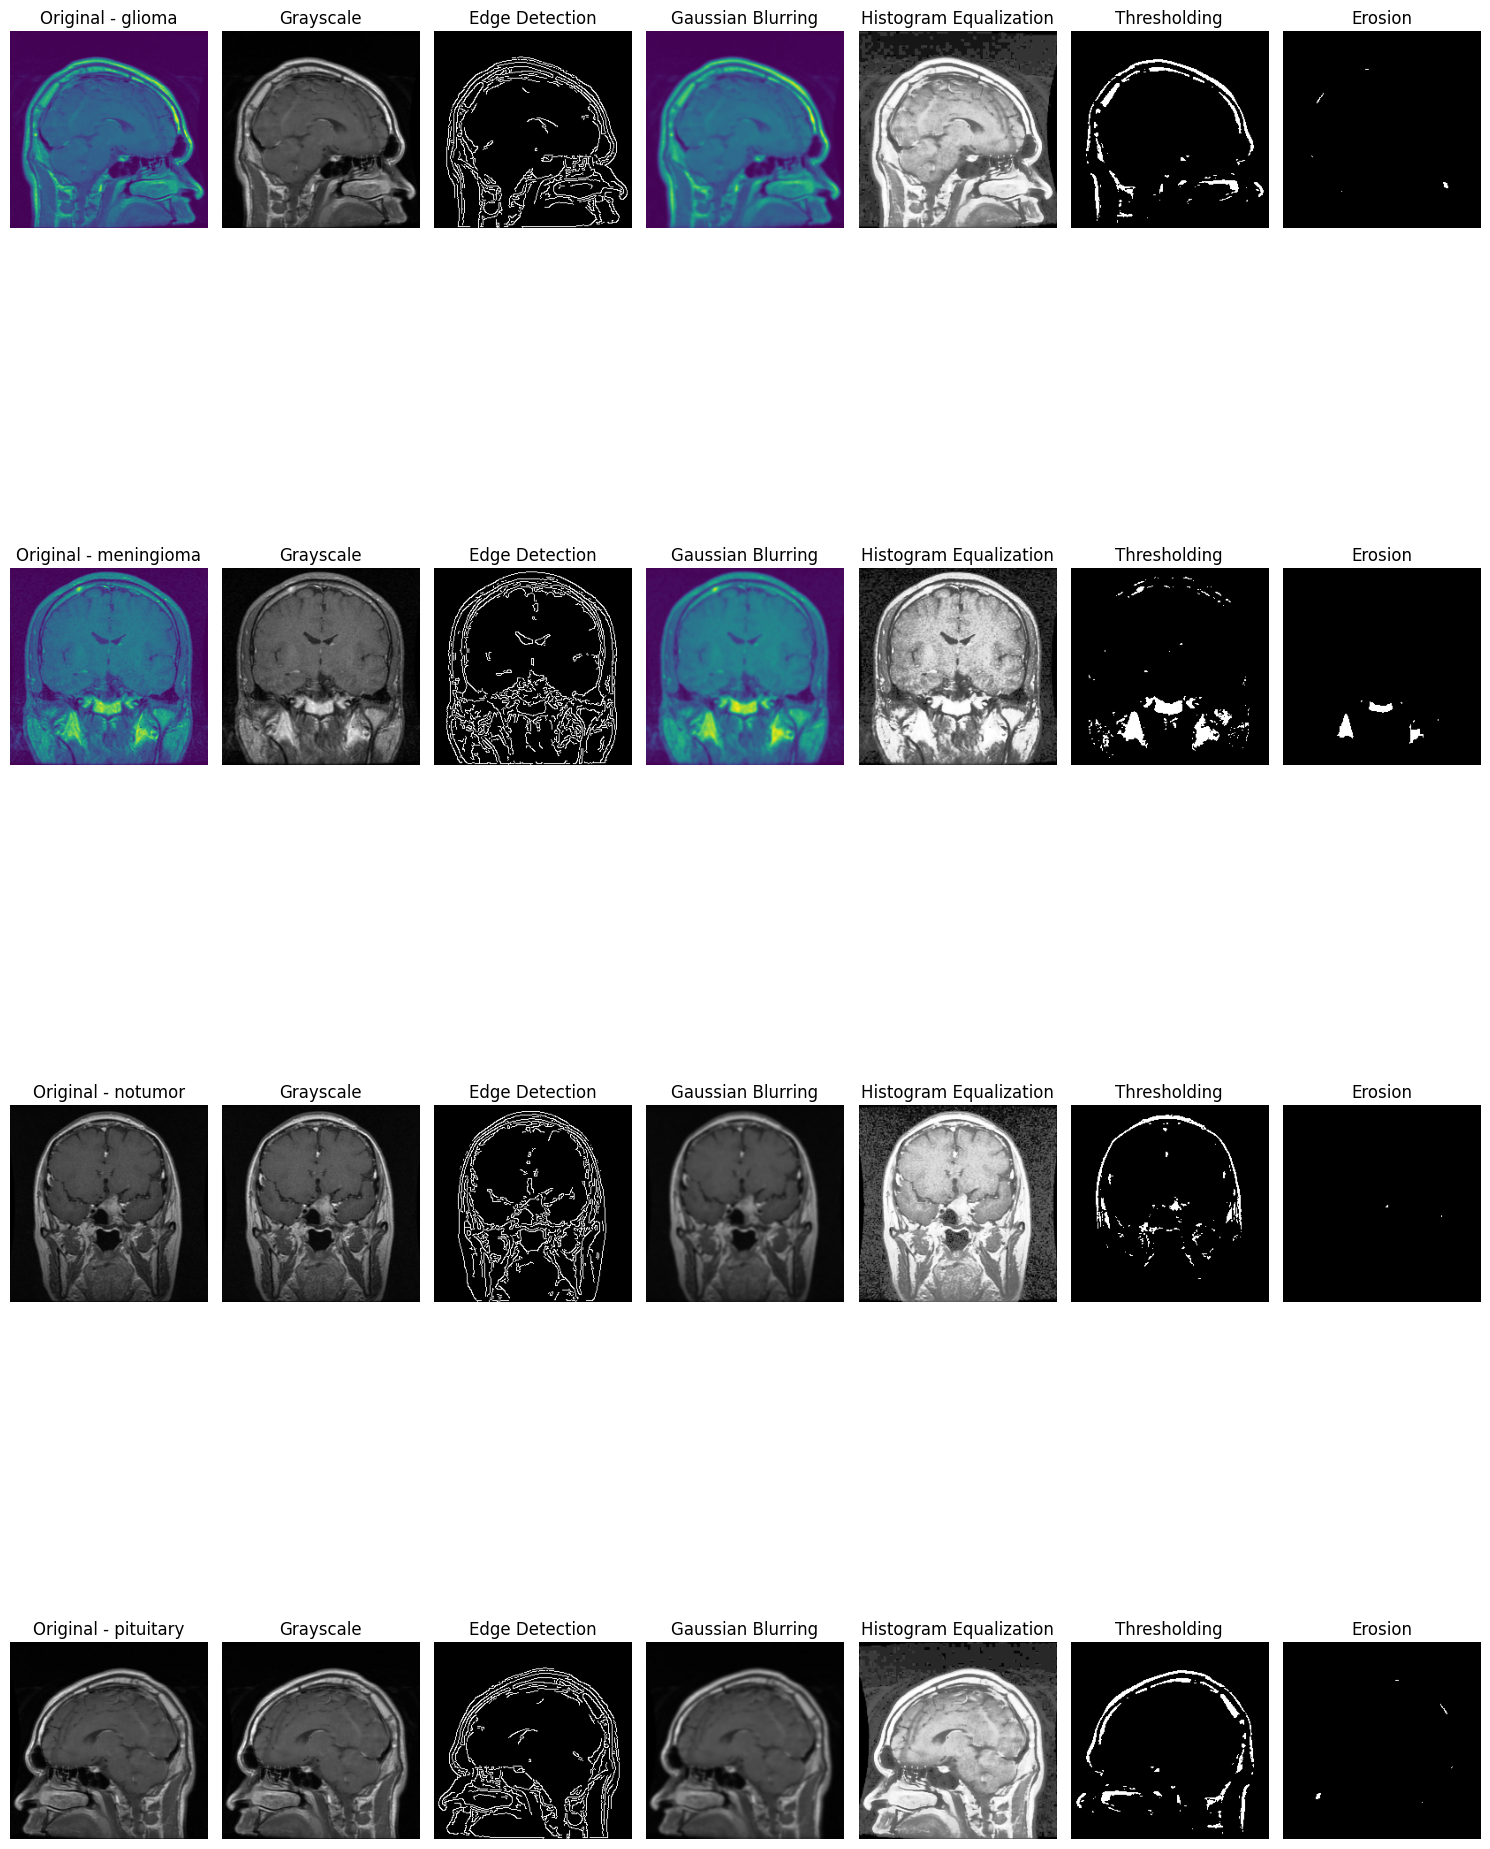

In [22]:

import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'class_name' and 'img_data' are defined
# 'class_name' is a list of class labels, and 'img_data' contains the corresponding image data

unique_classes = np.unique(class_types)

# Create a larger figure size to accommodate all visualizations
plt.figure(figsize=(15, len(unique_classes) * 6))

# Iterate through each unique class for visualization
for i, unique_class in enumerate(unique_classes):
    # Find an image index for each class
    indices = [index for index, label in enumerate(class_types) if label == unique_class]
    sample_image = (img_data[indices[0]] * 255).astype('uint8')  # Convert back to uint8 for processing

    # Original Image
    plt.subplot(len(unique_classes), 7, i * 7 + 1)
    plt.imshow(sample_image)
    plt.title(f"Original - {unique_class}")
    plt.axis('off')

    # Check if the image is already grayscale (1 channel)
    if len(sample_image.shape) == 3 and sample_image.shape[2] == 3:  # RGB Image
        # Convert to Grayscale
        gray_image = cv.cvtColor(sample_image, cv.COLOR_RGB2GRAY)
    else:
        gray_image = sample_image  # Already grayscale

    plt.subplot(len(unique_classes), 7, i * 7 + 2)
    plt.imshow(gray_image, cmap='gray')
    plt.title("Grayscale")
    plt.axis('off')

    # Edge Detection (Canny)
    edges = cv.Canny(gray_image, 100, 200)
    plt.subplot(len(unique_classes), 7, i * 7 + 3)
    plt.imshow(edges, cmap='gray')
    plt.title("Edge Detection")
    plt.axis('off')

    # Gaussian Blurring
    blurred_image = cv.GaussianBlur(sample_image, (5, 5), 0)
    plt.subplot(len(unique_classes), 7, i * 7 + 4)
    plt.imshow(blurred_image)
    plt.title("Gaussian Blurring")
    plt.axis('off')

    # Histogram Equalization
    equalized_image = cv.equalizeHist(gray_image)
    plt.subplot(len(unique_classes), 7, i * 7 + 5)
    plt.imshow(equalized_image, cmap='gray')
    plt.title("Histogram Equalization")
    plt.axis('off')

    # Thresholding (Binarization)
    _, thresholded_image = cv.threshold(gray_image, 127, 255, cv.THRESH_BINARY)
    plt.subplot(len(unique_classes), 7, i * 7 + 6)
    plt.imshow(thresholded_image, cmap='gray')
    plt.title("Thresholding")
    plt.axis('off')

    # Morphological Operations (Erosion)
    kernel = np.ones((5, 5), np.uint8)
    eroded_image = cv.erode(thresholded_image, kernel, iterations=1)
    plt.subplot(len(unique_classes), 7, i * 7 + 7)
    plt.imshow(eroded_image, cmap='gray')
    plt.title("Erosion")
    plt.axis('off')

plt.tight_layout()
plt.show()


In [23]:
# Image size
image_size = (224,224)

# Training batch size
batch_size = 32

In [24]:
# Image Augmentation for training
train_datagen = ImageDataGenerator(
    rescale=1./255, 
    rotation_range=30, 
    width_shift_range=0.2, 
    height_shift_range=0.2, 
    shear_range=0.2, 
    zoom_range=0.2, 
    horizontal_flip=True, 
    fill_mode='nearest')


In [25]:
# Validation data should not have augmentation
test_datagen = ImageDataGenerator(rescale=1./255)

In [26]:
# Load training and testing data
train_generator = train_datagen.flow_from_directory(
    train_dir, 
    target_size=(224, 224), 
    batch_size=32, 
    class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
    test_dir, 
    target_size=(224, 224), 
    batch_size=32, 
    class_mode='categorical')

Found 5712 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.


In [27]:
class_indices_train = train_generator.class_indices
class_indices_train_list = list(train_generator.class_indices.keys())


# Displaying categorical types
print("Categorical types for the training data:")
print(class_indices_train)

Categorical types for the training data:
{'glioma': 0, 'meningioma': 1, 'notumor': 2, 'pituitary': 3}


In [28]:
# Image shape: height, width, RBG
image_shape = (image_size[0], image_size[1], 3)

# Training epochs
epochs = 40

# Steps per epoch
steps_per_epoch = train_generator.samples // batch_size

# Validation steps
validation_steps = test_generator.samples // batch_size

print(f'Image shape: {image_shape}')
print(f'Epochs: {epochs}')
print(f'Batch size: {batch_size}')
print(f'Steps Per Epoch: {steps_per_epoch}')
print(f'Validation steps: {validation_steps}')

Image shape: (224, 224, 3)
Epochs: 40
Batch size: 32
Steps Per Epoch: 178
Validation steps: 40


In [29]:
class_types = ['pituitary', 'notumor', 'meningioma', 'glioma']
n_types = len(class_types)

In [30]:
# Define the model architecture
model = models.Sequential()

# Convolutional layer 1
model.add(Conv2D(32, (4, 4), activation="relu", input_shape=image_shape))
model.add(MaxPooling2D(pool_size=(3, 3)))

# Convolutional layer 2
model.add(Conv2D(64, (4, 4), activation="relu"))
model.add(MaxPooling2D(pool_size=(3, 3)))

# Convolutional layer 3
model.add(Conv2D(128, (4, 4), activation="relu"))
model.add(MaxPooling2D(pool_size=(3, 3)))

# Convolutional layer 4
model.add(Conv2D(128, (4, 4), activation="relu"))
model.add(Flatten())

# Full connect layers
model.add(Dense(512, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(n_types, activation="softmax"))

In [31]:

# !pip install keras==2.15.0

In [32]:
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics= ['accuracy'])

In [33]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 221, 221, 32)   │         1,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 73, 73, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 70, 70, 64)     │        32,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 23, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 20, 20, 128)    │       131,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 3, 3, 128)      │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       590,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │         2,052 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,020,260 (3.89 MB)

 Trainable params: 1,020,260 (3.89 MB)

 Non-trainable params: 0 (0.00 B)

In [34]:
!pip install visualkeras

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.7/993.7 kB 11.6 MB/s eta 0:00:0000:010:01


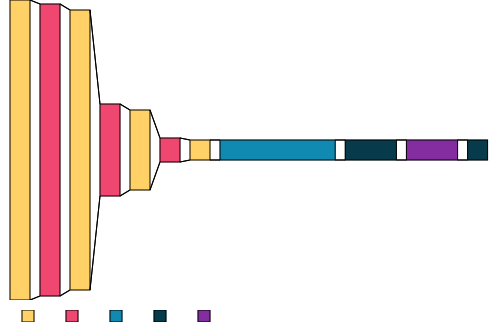

In [40]:
from visualkeras import layered_view

# Visualize the model
layered_view(model, legend=True, max_xy=300, draw_volume=False)

In [36]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ReduceLROnPlateau

model_es = EarlyStopping(monitor='val_loss',patience=5, verbose=0,restore_best_weights=False)
model_rlr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=10, verbose=0, min_delta=0.0001)

In [39]:
# Training the model
history = model.fit(train_generator,
                    steps_per_epoch=steps_per_epoch,
                    epochs=epochs,
                    validation_data=test_generator,
                    validation_steps=validation_steps,
                    callbacks=[model_es, model_rlr])

Epoch 1/40
178/178 ━━━━━━━━━━━━━━━━━━━━ 71s 386ms/step - accuracy: 0.8222 - loss: 0.4604 - val_accuracy: 0.7680 - val_loss: 0.7181 - learning_rate: 0.0010
Epoch 2/40
178/178 ━━━━━━━━━━━━━━━━━━━━ 0s 209us/step - accuracy: 0.8438 - loss: 0.4949 - val_accuracy: 0.8065 - val_loss: 0.8914 - learning_rate: 0.0010
Epoch 3/40
178/178 ━━━━━━━━━━━━━━━━━━━━ 71s 382ms/step - accuracy: 0.8491 - loss: 0.3961 - val_accuracy: 0.8141 - val_loss: 0.4804 - learning_rate: 0.0010
Epoch 4/40
178/178 ━━━━━━━━━━━━━━━━━━━━ 0s 262us/step - accuracy: 0.8750 - loss: 0.2866 - val_accuracy: 0.7097 - val_loss: 0.9485 - learning_rate: 0.0010
Epoch 5/40
178/178 ━━━━━━━━━━━━━━━━━━━━ 70s 378ms/step - accuracy: 0.8441 - loss: 0.3888 - val_accuracy: 0.8578 - val_loss: 0.3764 - learning_rate: 0.0010
Epoch 6/40
178/178 ━━━━━━━━━━━━━━━━━━━━ 0s 198us/step - accuracy: 0.8750 - loss: 0.3154 - val_accuracy: 0.7097 - val_loss: 0.6935 - learning_rate: 0.0010
Epoch 7/40
178/178 ━━━━━━━━━━━━━━━━━━━━ 70s 377ms/step - accuracy: 0.8708

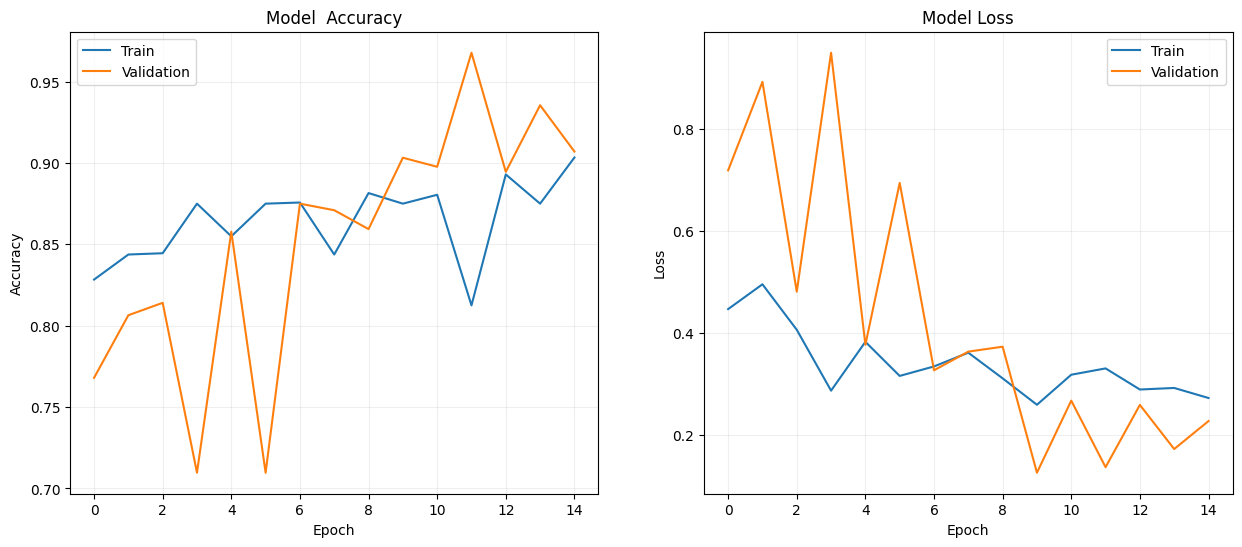

In [41]:
_, ax = plt.subplots(ncols=2, figsize=(15, 6))

# Plot the training and validation accuracy over epochs
ax[0].plot(history.history['accuracy'])
ax[0].plot(history.history['val_accuracy'])
ax[0].set_title('Model  Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Accuracy')
ax[0].legend(['Train', 'Validation'])
ax[0].grid(alpha=0.2)

# Plot the training and validation loss over epochs
ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_title('Model Loss')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Loss')
ax[1].legend(['Train', 'Validation'])
ax[1].grid(alpha=0.2)

plt.show()

In [42]:
# Evaluating the model
loss, accuracy = model.evaluate(test_generator, steps=test_generator.samples//batch_size)
print(f"Test Loss: {loss:0.5f}")
print(f"Test Accuracy: {accuracy:0.5f}")

40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 74ms/step - accuracy: 0.9071 - loss: 0.2326
Test Loss: 0.22760
Test Accuracy: 0.90625


In [43]:
from sklearn.metrics import confusion_matrix
import numpy as np

# Define a custom function for confusion matrix
def CM(CNN_model, test_generator, categories):
    # Get the true labels
    y_true = test_generator.classes 

    # Get the predicted labels from the model
    y_pred = CNN_model.predict(test_generator, verbose=1)
    y_pred_classes = np.argmax(y_pred, axis=1) 

    cm = confusion_matrix(y_true, y_pred_classes)

    return cm

41/41 ━━━━━━━━━━━━━━━━━━━━ 4s 86ms/step


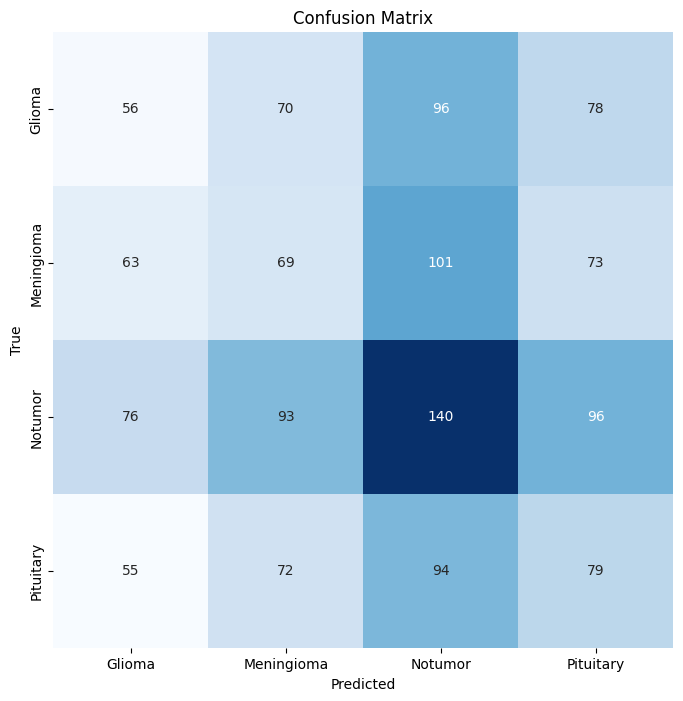

In [44]:
# Plotting confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = CM(CNN_model=model, test_generator=test_generator, categories=class_indices_train_list)

plt.figure(figsize=(8,8))
sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.xticks(ticks=np.arange(n_types) + 0.5,
           labels=[name.title() for name in class_indices_train_list], ha='center')
plt.yticks(ticks=np.arange(n_types) + 0.5, 
           labels=[name.title() for name in class_indices_train_list], va='center')
plt.show()

In [45]:
# Evaluate the model on the training set
train_score = model.evaluate(train_generator)
print(f"Training Loss: {train_score[0]}, Training Accuracy: {train_score[1]}")


# Evaluate the model on the test set
test_score = model.evaluate(test_generator)
print(f"Test Loss: {test_score[0]}, Test Accuracy: {test_score[1]}")

179/179 ━━━━━━━━━━━━━━━━━━━━ 67s 375ms/step - accuracy: 0.9192 - loss: 0.2298
Training Loss: 0.2243415117263794, Training Accuracy: 0.9198179244995117
41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 72ms/step - accuracy: 0.9097 - loss: 0.2181
Test Loss: 0.22504191100597382, Test Accuracy: 0.9077040553092957


In [46]:
# Predict using the generator
preds = model.predict(test_generator)

# Get the predicted class labels
y_pred = np.argmax(preds, axis=1)

41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 73ms/step


In [47]:
from sklearn.metrics import classification_report

# Print the classification report
print(classification_report(test_generator.classes, y_pred, target_names=class_types)) 

              precision    recall  f1-score   support

   pituitary       0.26      0.22      0.24       300
     notumor       0.26      0.26      0.26       306
  meningioma       0.30      0.32      0.31       405
      glioma       0.22      0.24      0.23       300

    accuracy                           0.26      1311
   macro avg       0.26      0.26      0.26      1311
weighted avg       0.26      0.26      0.26      1311



### RESNET 50

In [48]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import layers

base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224,224, 3))
base_model.trainable = False  # Freeze the layers

model_1 = tf.keras.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(4, activation='softmax')
])
model_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [49]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

lr_scheduler = ReduceLROnPlateau(
    monitor='val_loss', 
    factor=0.5, 
    patience=3, 
    verbose=1
)

history = model_1.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=epochs,
    validation_data=test_generator,
    validation_steps=validation_steps,
    callbacks=[model_es, model_rlr, lr_scheduler]
)

Epoch 1/40
178/178 ━━━━━━━━━━━━━━━━━━━━ 89s 421ms/step - accuracy: 0.3453 - loss: 1.3855 - val_accuracy: 0.4516 - val_loss: 1.1735 - learning_rate: 0.0010
Epoch 2/40
178/178 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 0.3750 - loss: 1.2355 - val_accuracy: 0.5806 - val_loss: 1.1181 - learning_rate: 0.0010
Epoch 3/40
178/178 ━━━━━━━━━━━━━━━━━━━━ 71s 384ms/step - accuracy: 0.4753 - loss: 1.1481 - val_accuracy: 0.4773 - val_loss: 1.1367 - learning_rate: 0.0010
Epoch 4/40
178/178 ━━━━━━━━━━━━━━━━━━━━ 0s 533us/step - accuracy: 0.6250 - loss: 1.0787 - val_accuracy: 0.4516 - val_loss: 1.3607 - learning_rate: 0.0010
Epoch 5/40
178/178 ━━━━━━━━━━━━━━━━━━━━ 71s 387ms/step - accuracy: 0.5030 - loss: 1.0974 - val_accuracy: 0.5250 - val_loss: 1.1054 - learning_rate: 0.0010


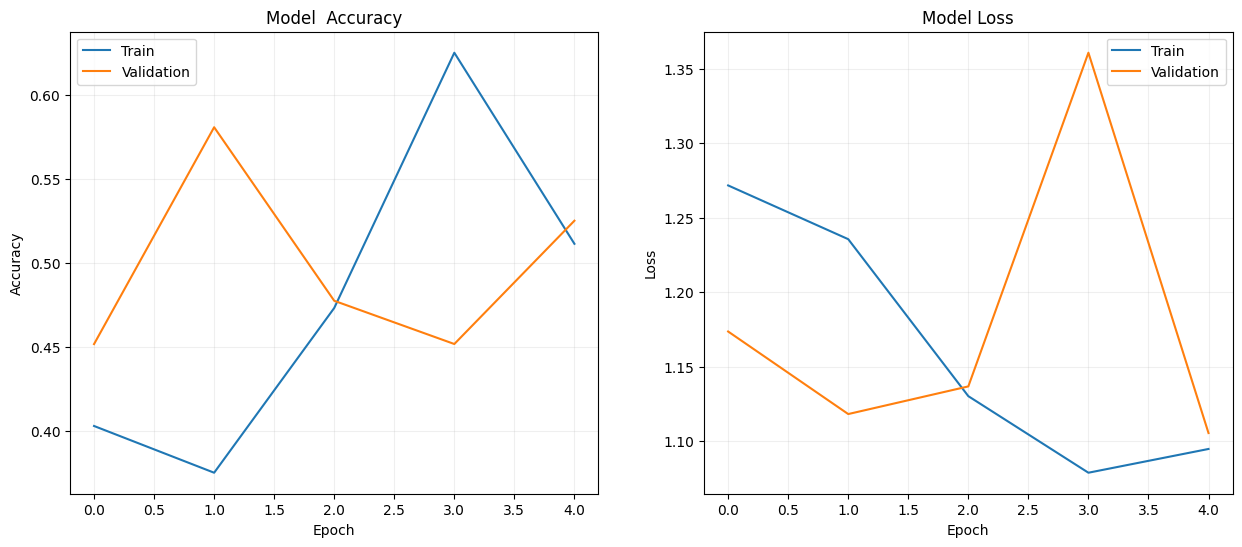

In [51]:
_, ax = plt.subplots(ncols=2, figsize=(15, 6))

# Plot the training and validation accuracy over epochs
ax[0].plot(history.history['accuracy'])
ax[0].plot(history.history['val_accuracy'])
ax[0].set_title('Model  Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Accuracy')
ax[0].legend(['Train', 'Validation'])
ax[0].grid(alpha=0.2)

# Plot the training and validation loss over epochs
ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_title('Model Loss')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Loss')
ax[1].legend(['Train', 'Validation'])
ax[1].grid(alpha=0.2)

plt.show()

### Model_3

In [52]:
# Create Model Structure
img_size = (224, 224)
channels = 3
img_shape = (img_size[0], img_size[1], channels)

class_count = len(list(train_generator.class_indices.keys())) # to define number of classes in dense layer

model_3 = Sequential([
    Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu", input_shape= img_shape),
    Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu"),
    MaxPooling2D((2, 2)),
    
    Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"),
    Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"),
    MaxPooling2D((2, 2)),
    
    Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"),
    Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"),
    Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"),
    MaxPooling2D((2, 2)),
    
    Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"),
    Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"),
    Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"),
    MaxPooling2D((2, 2)),
    
    Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"),
    Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"),
    Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"),
    MaxPooling2D((2, 2)),
    
    Flatten(),
    
    Dense(256,activation = "relu"),
    Dense(64,activation = "relu"),
    Dense(class_count, activation = "softmax")
])

model_3.compile(Adam(learning_rate= 0.001), loss= 'categorical_crossentropy', metrics= ['accuracy'])

model_3.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 256)            │     6,422,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 4)              │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,154,180 (80.70 MB)

 Trainable params: 21,154,180 (80.70 MB)

 Non-trainable params: 0 (0.00 B)

In [53]:
valid_test_datagen = ImageDataGenerator(rescale=1./255)

# Load training and testing data
valid_generator = valid_test_datagen.flow_from_directory(
    train_dir, 
    target_size=(224, 224), 
    batch_size=32, 
    class_mode='categorical')

Found 5712 images belonging to 4 classes.


In [54]:
class_labels = list(test_generator.class_indices.keys())
class_labels

['glioma', 'meningioma', 'notumor', 'pituitary']

In [55]:
optimizer = Adam(learning_rate=0.001)
model_3.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics= ['accuracy'])

In [56]:
# Training the model
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ReduceLROnPlateau

model_es = EarlyStopping(monitor='val_loss',patience=5, verbose=0,restore_best_weights=False)
model_rlr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=10, verbose=0, min_delta=0.0001)

In [57]:
history = model_3.fit(train_generator,
                    steps_per_epoch=steps_per_epoch,
                    epochs=epochs,
                    validation_data=test_generator,
                    validation_steps=validation_steps,
                    callbacks=[model_es, model_rlr])

Epoch 1/40
178/178 ━━━━━━━━━━━━━━━━━━━━ 146s 558ms/step - accuracy: 0.2745 - loss: 1.4346 - val_accuracy: 0.3094 - val_loss: 1.3814 - learning_rate: 0.0010
Epoch 2/40
178/178 ━━━━━━━━━━━━━━━━━━━━ 13s 73ms/step - accuracy: 0.2812 - loss: 1.3834 - val_accuracy: 0.2903 - val_loss: 1.3799 - learning_rate: 0.0010
Epoch 3/40
178/178 ━━━━━━━━━━━━━━━━━━━━ 77s 415ms/step - accuracy: 0.2747 - loss: 1.3848 - val_accuracy: 0.3086 - val_loss: 1.3815 - learning_rate: 0.0010
Epoch 4/40
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 733us/step - accuracy: 0.3750 - loss: 1.3742 - val_accuracy: 0.3226 - val_loss: 1.3653 - learning_rate: 0.0010
Epoch 5/40
178/178 ━━━━━━━━━━━━━━━━━━━━ 77s 413ms/step - accuracy: 0.2806 - loss: 1.3836 - val_accuracy: 0.3102 - val_loss: 1.3799 - learning_rate: 0.0010
Epoch 6/40
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 729us/step - accuracy: 0.3125 - loss: 1.3705 - val_accuracy: 0.2581 - val_loss: 1.3925 - learning_rate: 0.0010
Epoch 7/40
178/178 ━━━━━━━━━━━━━━━━━━━━ 76s 408ms/step - accuracy: 0.287

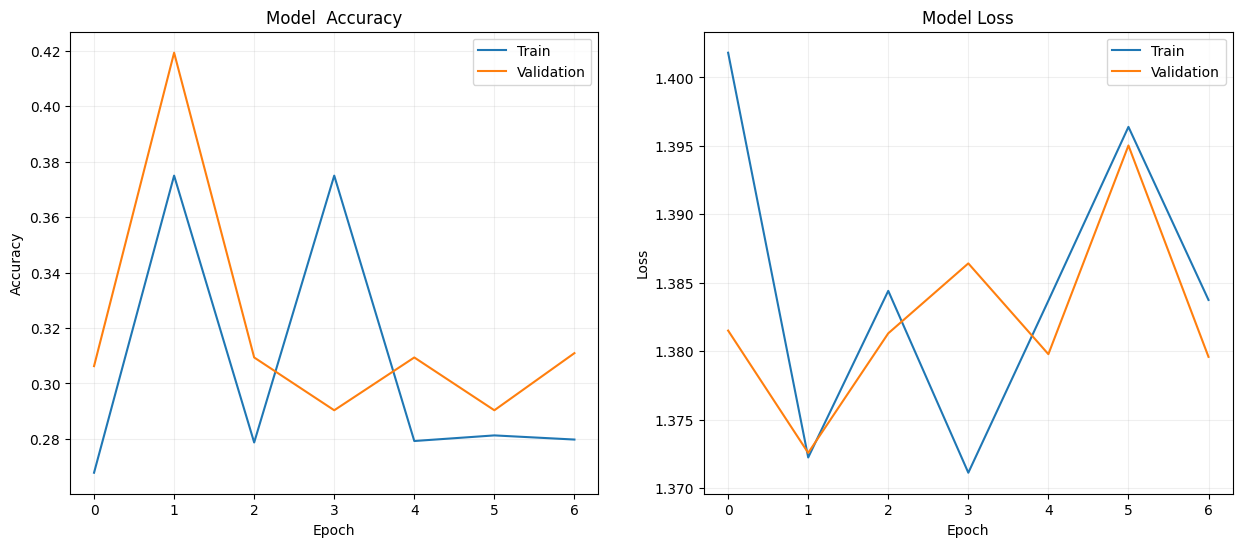

In [48]:
_, ax = plt.subplots(ncols=2, figsize=(15, 6))

# Plot the training and validation accuracy over epochs
ax[0].plot(history.history['accuracy'])
ax[0].plot(history.history['val_accuracy'])
ax[0].set_title('Model  Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Accuracy')
ax[0].legend(['Train', 'Validation'])
ax[0].grid(alpha=0.2)

# Plot the training and validation loss over epochs
ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_title('Model Loss')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Loss')
ax[1].legend(['Train', 'Validation'])
ax[1].grid(alpha=0.2)

plt.show()

### Model_4

In [49]:
img_shape=(224,224,3)
base_model = tf.keras.applications.Xception(include_top= False, weights= "imagenet",
                            input_shape= img_shape, pooling= 'max')

for layer in base_model.layers:
    layer.trainable = False
    
model_4 = Sequential([
    base_model,
    Flatten(),
    Dropout(rate= 0.3),
    Dense(128, activation= 'relu'),
    Dropout(rate= 0.25),
    Dense(4, activation= 'softmax')
])

model_4.compile(Adam(learning_rate= 0.001),
              loss= 'categorical_crossentropy',
              metrics= ['accuracy'])

model_4.summary()

83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ xception (Functional)           │ ?                      │    20,861,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,861,480 (79.58 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 20,861,480 (79.58 MB)

In [50]:
history = model_4.fit(train_generator, epochs=20, validation_data=test_generator,
                    validation_steps = None , shuffle = False,
                    callbacks=[model_es, model_rlr]) 

Epoch 1/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 110s 519ms/step - accuracy: 0.6113 - loss: 1.1624 - val_accuracy: 0.7872 - val_loss: 0.5367 - learning_rate: 0.0010
Epoch 2/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 71s 397ms/step - accuracy: 0.7887 - loss: 0.5382 - val_accuracy: 0.8078 - val_loss: 0.4792 - learning_rate: 0.0010
Epoch 3/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 71s 399ms/step - accuracy: 0.7968 - loss: 0.5286 - val_accuracy: 0.8223 - val_loss: 0.4550 - learning_rate: 0.0010
Epoch 4/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 71s 398ms/step - accuracy: 0.8188 - loss: 0.4691 - val_accuracy: 0.8261 - val_loss: 0.4218 - learning_rate: 0.0010
Epoch 5/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 71s 398ms/step - accuracy: 0.8356 - loss: 0.4266 - val_accuracy: 0.8162 - val_loss: 0.4283 - learning_rate: 0.0010
Epoch 6/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 71s 398ms/step - accuracy: 0.8373 - loss: 0.4188 - val_accuracy: 0.8352 - val_loss: 0.4057 - learning_rate: 0.0010
Epoch 7/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 72s 399ms/step - accuracy: 0.

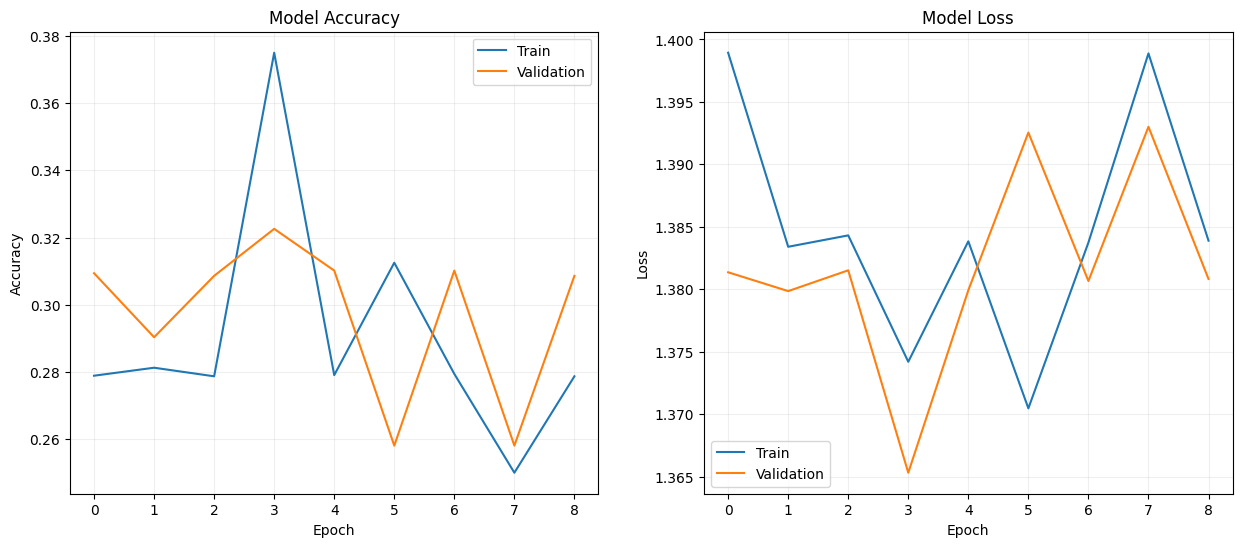

In [58]:
_, ax = plt.subplots(ncols=2, figsize=(15, 6))

# Plot the training and validation accuracy over epochs
ax[0].plot(history.history['accuracy'])
ax[0].plot(history.history['val_accuracy'])
ax[0].set_title('Model Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Accuracy')
ax[0].legend(['Train', 'Validation'])
ax[0].grid(alpha=0.2)

# Plot the training and validation loss over epochs
ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_title('Model Loss')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Loss')
ax[1].legend(['Train', 'Validation'])
ax[1].grid(alpha=0.2)

plt.show() 

**VGG19**

In [60]:
# Parameters
input_shape = (224, 224, 3)  # Standard input shape for VGG19
num_classes = 4   

In [62]:
from tensorflow.keras.applications import VGG19

In [63]:
base_model = VGG19(weights='imagenet', include_top=False, input_shape=input_shape)


80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [64]:
for layer in base_model.layers:
    layer.trainable = False

# Add custom classification layers
x = base_model.output
x = Flatten()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)  # Dropout layer to prevent overfitting
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(num_classes, activation='softmax')(x)

In [65]:
# Create the model
model = Model(inputs=base_model.input, outputs=output)

In [66]:
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [67]:
model.summary()

Model: "functional_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv4 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv4 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv4 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 512)            │    12,845,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             

 Total params: 33,002,308 (125.89 MB)

 Trainable params: 12,977,924 (49.51 MB)

 Non-trainable params: 20,024,384 (76.39 MB)

In [69]:
train_datagen = ImageDataGenerator(rescale=1.0/255, rotation_range=20, zoom_range=0.15,
                                   width_shift_range=0.2, height_shift_range=0.2, shear_range=0.15, 
                                   horizontal_flip=True, fill_mode="nearest")
val_datagen = ImageDataGenerator(rescale=1.0/255)

train_data = train_datagen.flow_from_directory(train_dir, target_size=(224, 224),
                                               batch_size=32, class_mode='categorical')
val_data = val_datagen.flow_from_directory(test_dir, target_size=(224, 224),
                                           batch_size=32, class_mode='categorical')

Found 5712 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.


In [70]:
history = model.fit(train_data, epochs=20, validation_data=val_data)

Epoch 1/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 84s 427ms/step - accuracy: 0.4060 - loss: 2.3432 - val_accuracy: 0.6911 - val_loss: 0.8269
Epoch 2/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 74s 399ms/step - accuracy: 0.5648 - loss: 0.9898 - val_accuracy: 0.7140 - val_loss: 0.7767
Epoch 3/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 74s 398ms/step - accuracy: 0.5652 - loss: 0.9774 - val_accuracy: 0.7216 - val_loss: 0.7884
Epoch 4/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 74s 398ms/step - accuracy: 0.6090 - loss: 0.9137 - val_accuracy: 0.6964 - val_loss: 0.7623
Epoch 5/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 74s 399ms/step - accuracy: 0.6119 - loss: 0.8865 - val_accuracy: 0.7391 - val_loss: 0.7268
Epoch 6/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 75s 401ms/step - accuracy: 0.5977 - loss: 0.9071 - val_accuracy: 0.7346 - val_loss: 0.7181
Epoch 7/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 75s 403ms/step - accuracy: 0.6026 - loss: 0.8654 - val_accuracy: 0.7307 - val_loss: 0.7320
Epoch 8/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 75s 405ms/step - accuracy: 0.5906 - loss: 0

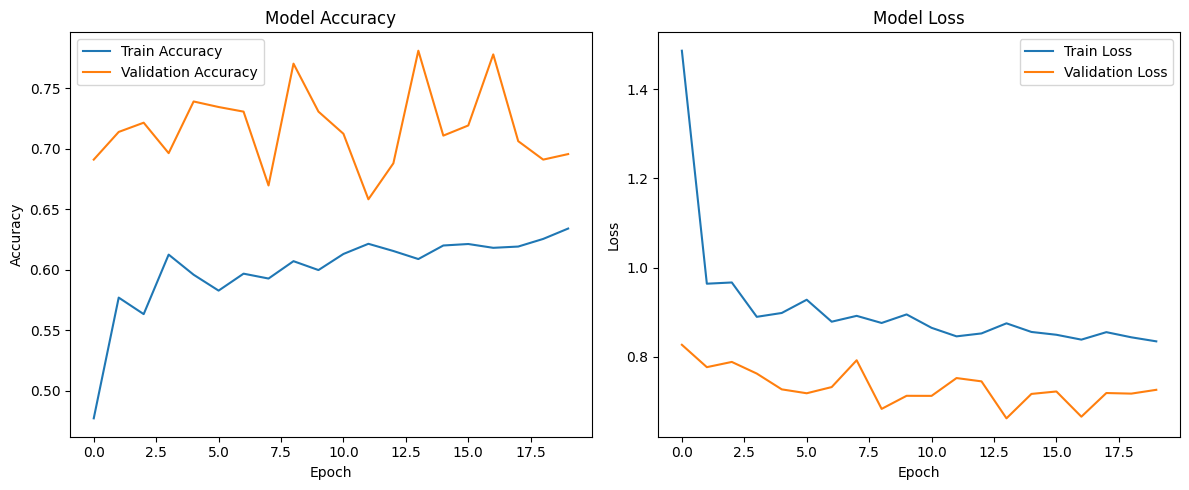

In [71]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='best')

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='best')

# Display the plots
plt.tight_layout()
plt.show()


Found 5712 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.
Epoch 1/30
179/179 ━━━━━━━━━━━━━━━━━━━━ 88s 442ms/step - accuracy: 0.3166 - loss: 14.4891 - val_accuracy: 0.5553 - val_loss: 12.7370
Epoch 2/30
179/179 ━━━━━━━━━━━━━━━━━━━━ 75s 406ms/step - accuracy: 0.5588 - loss: 12.4262 - val_accuracy: 0.6514 - val_loss: 11.3178
Epoch 3/30
179/179 ━━━━━━━━━━━━━━━━━━━━ 76s 407ms/step - accuracy: 0.6629 - loss: 11.0845 - val_accuracy: 0.7285 - val_loss: 10.2871
Epoch 4/30
179/179 ━━━━━━━━━━━━━━━━━━━━ 75s 403ms/step - accuracy: 0.7460 - loss: 10.0499 - val_accuracy: 0.7506 - val_loss: 9.4982
Epoch 5/30
179/179 ━━━━━━━━━━━━━━━━━━━━ 76s 406ms/step - accuracy: 0.7750 - loss: 9.2890 - val_accuracy: 0.7933 - val_loss: 8.8397
Epoch 6/30
179/179 ━━━━━━━━━━━━━━━━━━━━ 82s 404ms/step - accuracy: 0.8058 - loss: 8.6531 - val_accuracy: 0.8154 - val_loss: 8.2730
Epoch 7/30
179/179 ━━━━━━━━━━━━━━━━━━━━ 75s 402ms/step - accuracy: 0.8324 - loss: 8.1074 - val_accuracy: 0.8482 - val_loss:

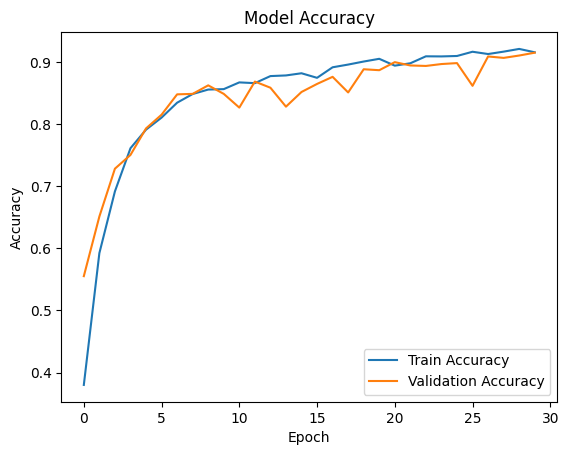

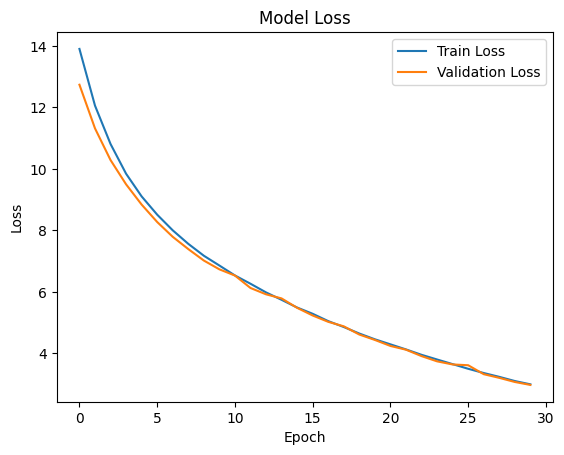

In [73]:
from tensorflow.keras.applications import VGG19
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping

# Model parameters
input_shape = (224, 224, 3)
num_classes = 4

# Load VGG19 with pre-trained ImageNet weights, excluding the top layers
base_model = VGG19(weights='imagenet', include_top=False, input_shape=input_shape)

# Freeze the initial layers, except the last few for fine-tuning
for layer in base_model.layers[:-4]:  # Fine-tuning last 4 layers
    layer.trainable = False

# Add custom classification layers with dropout and L2 regularization
x = Flatten()(base_model.output)
x = Dense(512, activation='relu', kernel_regularizer=l2(0.01))(x)
x = Dropout(0.5)(x)
x = Dense(256, activation='relu', kernel_regularizer=l2(0.01))(x)
x = Dropout(0.5)(x)
output = Dense(num_classes, activation='softmax')(x)

# Create the model
model = Model(inputs=base_model.input, outputs=output)

# Compile the model with a reduced learning rate
model.compile(optimizer=Adam(learning_rate=1e-5), loss='categorical_crossentropy', metrics=['accuracy'])

# Data augmentation
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=30,
    zoom_range=0.2,
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode="nearest"
)
val_datagen = ImageDataGenerator(rescale=1.0/255)

# Load training and validation data
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)
val_data = val_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

# Early stopping callback to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(
    train_data,
    epochs=30,
    validation_data=val_data,
    callbacks=[early_stopping]
)

# Plotting accuracy and loss curves
import matplotlib.pyplot as plt

# Accuracy curve
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Loss curve
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
